In [13]:
%matplotlib inline

# Preparativos
Primero descargamos las imagenes y hacemos un crop para que los ojos esten en la misma posicion, de esta forma cuando hagamos la imagen hibrida se solaparán las caras correctamente. Es por una cuestion estetica.

In [14]:
from skimage import io, transform
#LOAD IMAGES
human_img_original = io.imread('human.png')
cat_img = io.imread('cat.png')
cat_img = cat_img / 255.0

##RESIZE
size1=int(round(human_img_original.shape[0]*(4/3.)));

size2=int(round(human_img_original.shape[1]*(4/3.)));
human_img_original = transform.resize(human_img_original,
(size1, size2));
#CROP
left = 50
top = 50
right = 51+cat_img.shape[0]-1
bottom = 51+cat_img.shape[1]-1
human_img=human_img_original[left: right, top:bottom]


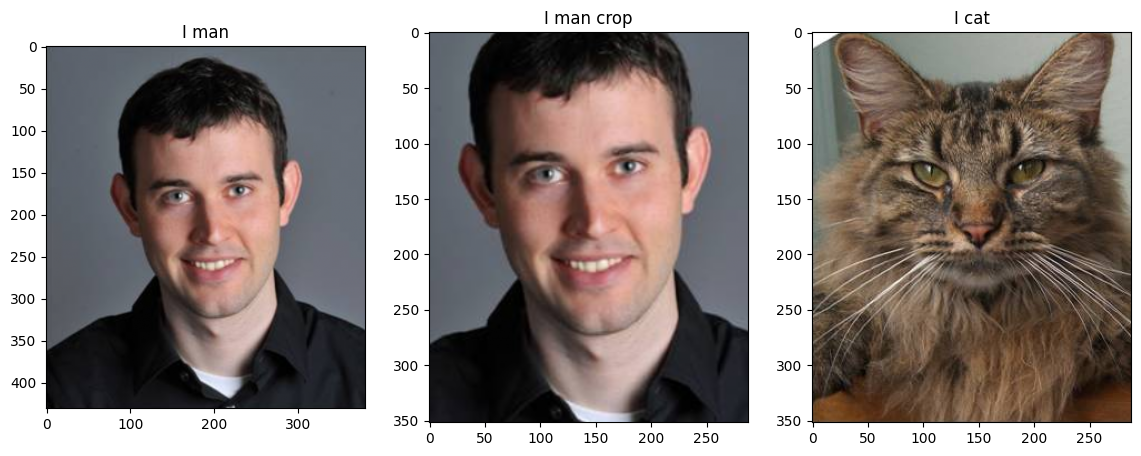

In [15]:
import matplotlib.pyplot as plt
# VISUALIZATION ---------------
plt.figure(1)
plt.subplot(131)

imgplot1=plt.imshow(human_img_original,cmap="gray")
plt.title('I man')
plt.subplot(132)
plt.title('I man crop')

imgplot1=plt.imshow(human_img,cmap="gray")
plt.subplot(133)
plt.title('I cat')

imgplot1=plt.imshow(cat_img,cmap="gray")
plt.gcf().set_size_inches((14,14))

# Gaussian filter
Esta es una funcion que necesitaremos para el resto de ejercicios. Implementa la funcion de la gaussiana y crea una imagen que sigue una distribucion gaussiana con los parametros size (tamaño de la imagen), y sigma (parametro de la distribucion gaussiana que indica la "anchura" de la campana)

Esta funcion consiste en crear una meshgrid (cuadricula) y repartir valores en una distribución gaussiana siguiendo la funcion gaussiana:
$$f(x, y) = \exp\left(-\frac{x^2 + y^2}{2\sigma^2}\right)$$



[[2.43572344e-07 3.37840704e-07 4.62843651e-07 ... 4.62843651e-07
  3.37840704e-07 2.43572344e-07]
 [3.37840704e-07 4.68593188e-07 6.41975283e-07 ... 6.41975283e-07
  4.68593188e-07 3.37840704e-07]
 [4.62843651e-07 6.41975283e-07 8.79509722e-07 ... 8.79509722e-07
  6.41975283e-07 4.62843651e-07]
 ...
 [4.62843651e-07 6.41975283e-07 8.79509722e-07 ... 8.79509722e-07
  6.41975283e-07 4.62843651e-07]
 [3.37840704e-07 4.68593188e-07 6.41975283e-07 ... 6.41975283e-07
  4.68593188e-07 3.37840704e-07]
 [2.43572344e-07 3.37840704e-07 4.62843651e-07 ... 4.62843651e-07
  3.37840704e-07 2.43572344e-07]]


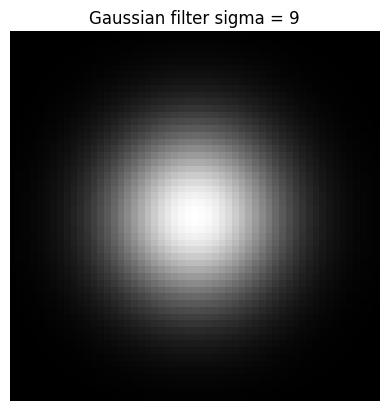

In [36]:
import numpy as np

# Creamos la funcion del filtro gaussiano
def gauss(size, sigma=9):
    #Gaussian filter
    [xx,yy]=np.meshgrid(np.linspace(-(size // 2), size // 2, size), np.linspace(-(size // 2), size // 2, size))
    gaussian = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    gaussian /= np.sum(gaussian)
    return gaussian

# Definimos las variables de size y sigma
sigma = 9
size = 6*sigma+1
gaussian = gauss(size, 9)

plt.axis('off')
plt.title(f"Gaussian filter sigma = {sigma}")
plt.imshow(gaussian, cmap='gray')

# Ejercicio 1. Imagen hibrida en el dominio del espacio

El ejercicio propone conseguir las imagenes LP (Low Pass) y HP (High Pass) the un humano y un gato respectivamente para luego fusionarlos. 

Una imagen LP es una imagen que contiene las bajas frecuencias mientras que un HP es una imagen que contiene solo las altas frecuencias. 

Para conseguir la imagen LP podemos aplicar un filtro gaussiano. La imagen 

Para conseguir la imagen HP podemos aplicar Img_original - img_LP. (Le restamos las bajas frecuencias a la imagen original).

Como estamos en el dominio del espacio haremos una convolución de la imagen con el filtro que hemos definido antes.

Para conseguir la fusion simplemente sumamos las dos imagenes LP y HP. La imagen LP contiene la forma original de la imagen, mientras que la imagen HP contiene los detalles de la imagen, al sumarlos tendremos la forma original de la imagen LP más los detalles de la imagen HP.

Primero, como indica en la practica lo hacemos en blanco y negro. 

(np.float64(-0.5), np.float64(287.5), np.float64(351.5), np.float64(-0.5))

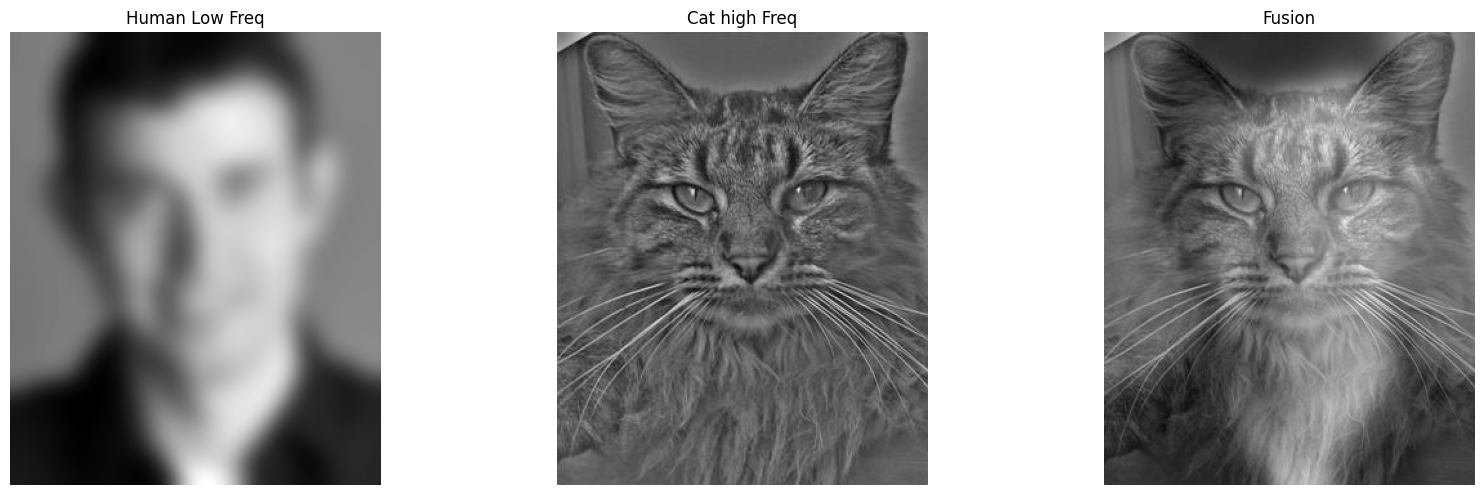

In [35]:
from scipy import ndimage
from skimage.color import rgb2gray

# Imagenes en blanco y negro
human_img_gray = rgb2gray(human_img)
cat_img_gray = rgb2gray(cat_img)

# Creamos la funcion de gauss
gauss_img = gauss(size, 9)

# Hacemos la convolucion de la imagen en grayscale y el filtro gaussiano
human_lowFreq = ndimage.convolve(human_img_gray, gauss_img)

# Para conseguir la imagen de alta frequencia restamos la imagen de baja frequencia a la imagen original
cat_lowFreq = ndimage.convolve(cat_img_gray, gauss_img)
cat_highFreq = cat_img_gray - cat_lowFreq

plt.figure(figsize=(20, 20))

plt.subplot(3, 3, 1)
plt.title("Human Low Freq")
plt.imshow(human_lowFreq, cmap='gray')
plt.axis('off')

plt.subplot(3,3,2)
plt.title("Cat high Freq")
plt.imshow(cat_highFreq, cmap='gray')
plt.axis('off')

plt.subplot(3,3,3)
plt.title("Fusion")
plt.imshow(cat_highFreq + human_lowFreq, cmap='gray')
plt.axis('off')

Para hacerlo tambien a color simplemente hacemos la misma operacion que antes pero para cada canal. Utilizamos un bucle for para iterar por cada canal, el procedimiento es similar.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.40036426762046573..0.6757526255848971].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.25156841050066786..1.363948256378114].


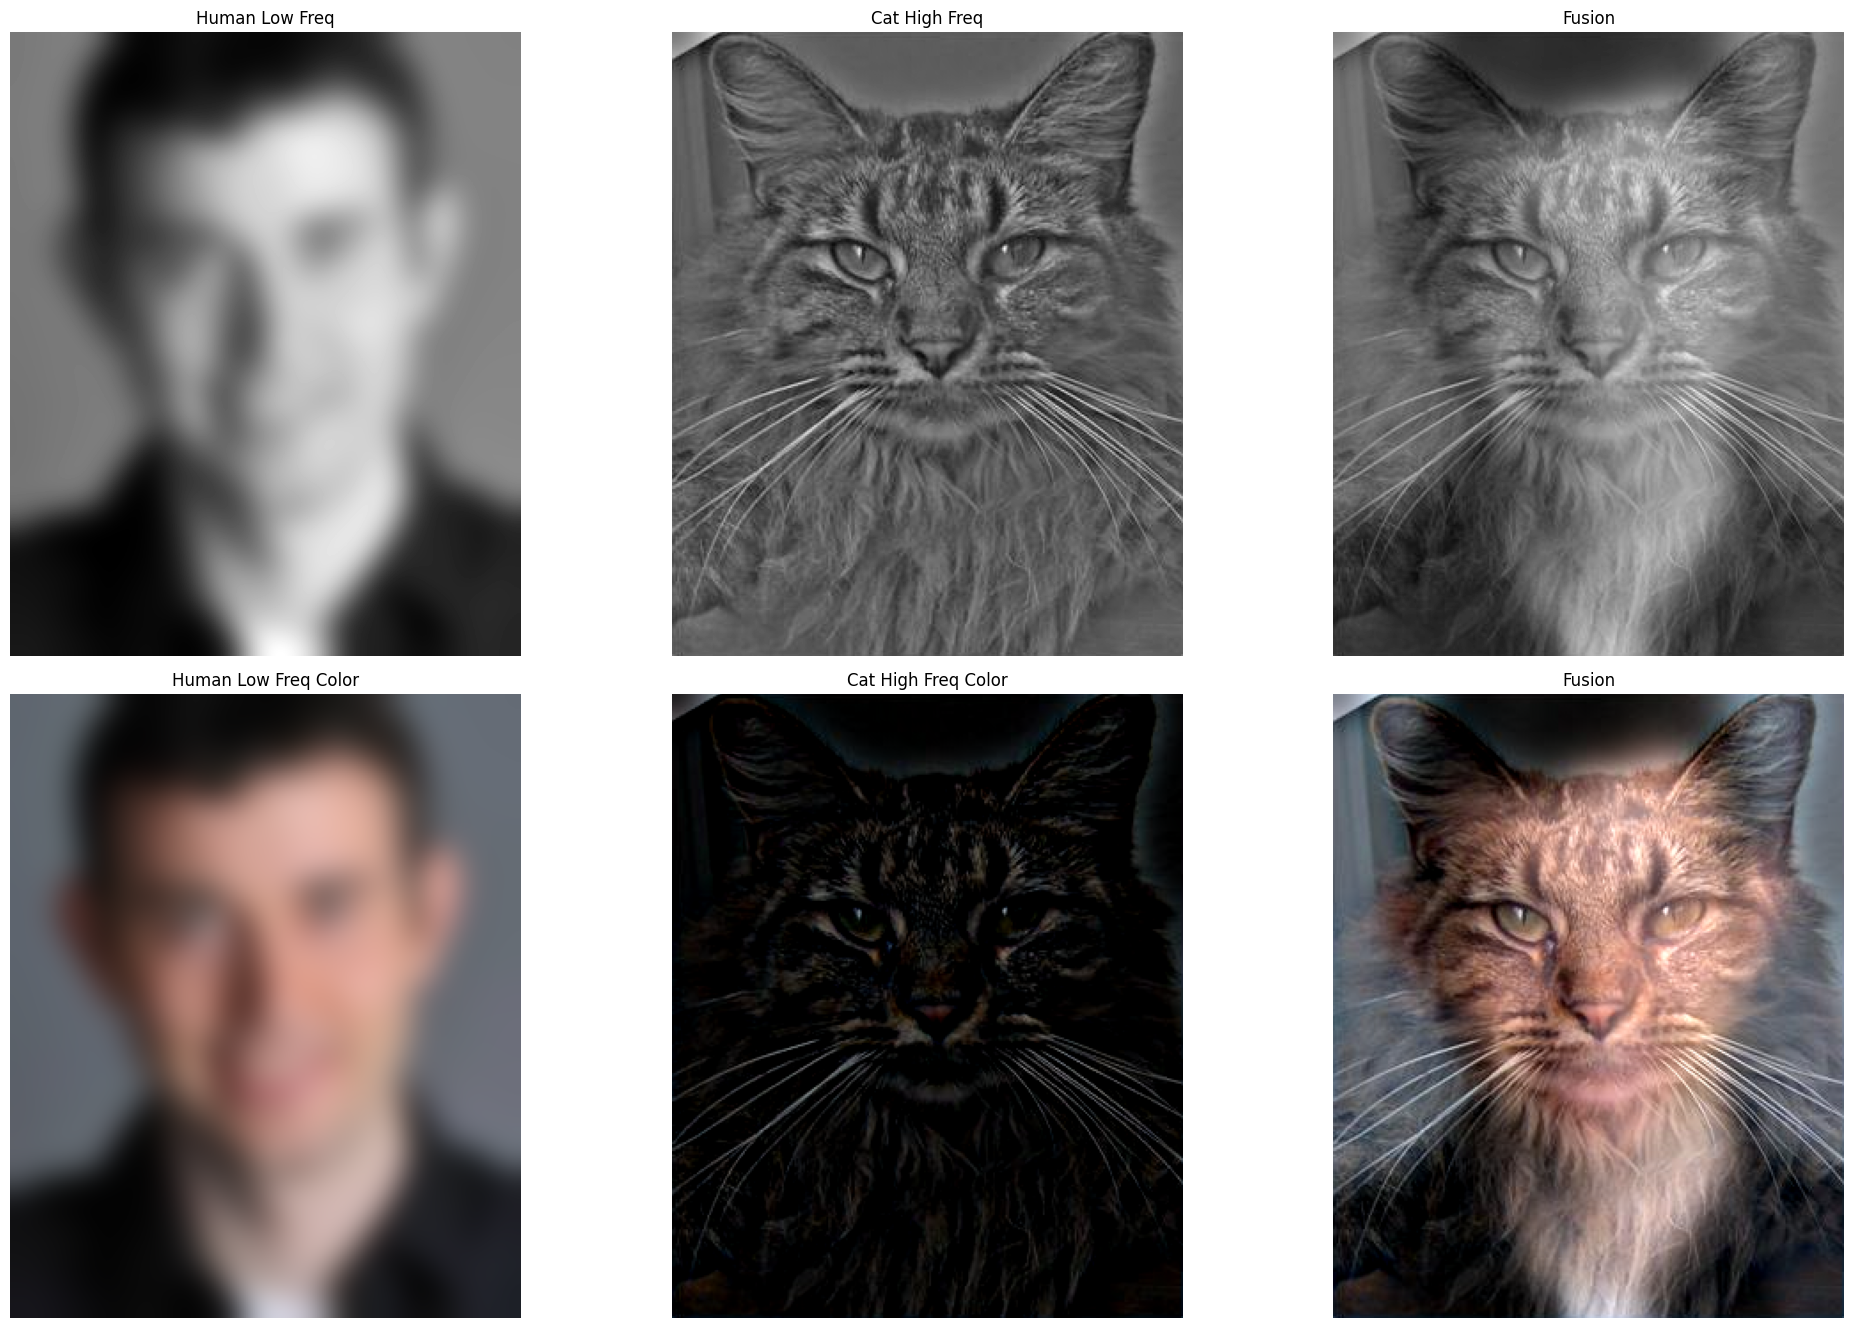

In [18]:
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt

# Crear el filtro gaussiano
gauss_img = gauss(size, sigma)

# Convolución en escala de grises
human_lowFreq = ndimage.convolve(human_img_gray, gauss_img)
cat_lowFreq = ndimage.convolve(cat_img_gray, gauss_img)
cat_highFreq = cat_img_gray - cat_lowFreq

# Convolución en color
# Estas variables almacenaran los resultados
human_lowFreq_3d = np.zeros_like(human_img, dtype=np.float32)
cat_highFreq_3d = np.zeros_like(cat_img, dtype=np.float32)

cat_lowFreq_3d = np.zeros(shape=cat_img.shape)

for c in range(3):  # Para cada canal de color
    # Hacemos la convolucion de la imagen con el filtro
    human_lowFreq_3d[:, :, c] = ndimage.convolve(human_img[:, :, c], gauss_img)
    cat_lowFreq_3d[:, :, c] = ndimage.convolve(cat_img[:, :, c], gauss_img)

cat_highFreq_3d = cat_img.astype(np.float32) - cat_lowFreq_3d

# Visualizar los resultados
plt.figure(figsize=(20, 20))

plt.subplot(3, 3, 1)
plt.title("Human Low Freq")
plt.imshow(human_lowFreq, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.title("Cat High Freq")
plt.imshow(cat_highFreq, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.title("Fusion")
plt.imshow(cat_highFreq + human_lowFreq.astype(np.float32), cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.title("Human Low Freq Color")
plt.imshow(human_lowFreq_3d)
plt.axis('off')

plt.subplot(3, 3, 5)
plt.title("Cat High Freq Color")
plt.imshow(cat_highFreq_3d)
plt.axis('off')

plt.subplot(3, 3, 6)
plt.title("Fusion")
plt.imshow(human_lowFreq_3d + cat_highFreq_3d)
plt.axis('off')

plt.tight_layout()
plt.show()


In [19]:
# Esta es una funcion auxiliar que me he hecho para hacer el plot de las imagenes
def custom_plot(data, final_img):

    """
        cada fila de data tiene que tener el siguiente formato
        [ YLabel, [Conjunto de titulos], [(Tipo : str, imagen)] ]

        Tipos de imagen:
        - gray
        - color
        - fft
    """

    from matplotlib.gridspec import GridSpec
    from scipy.fftpack import fftshift

    # Conseguimos el tamaño del grid
    sizeX, sizeY = len(data), max(len(item[1]) for item in data)
    
    fig = plt.figure(figsize=(20, 20))
    gs = GridSpec(sizeX, sizeY, figure=fig)
    n_img = 0            

    for x in range(sizeX):
        for y in range(len(data[x][1])):
            plot = fig.add_subplot(gs[x, y])

            tipo, img = data[x][-1][y]

            plot.set_title(data[x][1][y])
            if tipo == "gray":
                plot.imshow(img, cmap='gray')
            elif tipo == "fft":
                plot.imshow(fftshift(np.log(1+np.abs(img))),cmap="jet")
            else:
                plot.imshow(img)

        fig.get_axes()[n_img].set_ylabel(data[x][0], fontdict={"fontsize" : 24, "fontweight" : "bold"})
        n_img += len(data[x][1])

    if final_img is not None:
        plot = fig.add_subplot(gs[sizeX -2: sizeX, sizeY-2: sizeY])
        plot.set_title("Final Fusion")
        plot.imshow(final_img)

    plt.tight_layout(rect=[0.05, 0.05, 1, 0.93])

    plt.show()    

# Ejercicio 2. Dominio de frequencia
## Blanco y negro
Para conseguir la imagen Low Frequency hay que seguir los siguientes pasos.
- Definir un fftsize, tiene que ser potencia de 2 y superior al tamaño de la imagen
- Hacer la transformada de fourier a la imagen y al filtro
- Multiplicar las transformadas de la imagen y el filtro
- Hacer la transformada inversa del resultado y quedarnos con la parte real.

Para conseguir la imagen High Frequency hay que seguir los siguientes pasos.
- Conseguir la imagen Low Frequency
- Restar la imagen original a la imagen Low Frequency

## Imagenes a color
Seguimos los mismos pasos que a color, pero lo hacemos por cada canal independientemente.

# Representación

En el plot se mostrarán las diferentes fases del proceso con su titulo. Para la imagen a color no se muestra ya que es lo mismo pero con cada canal.

In [20]:
from scipy.fftpack import fft2, ifft2

def fourier_filter(img, filter, fftsize):
    channel_fft = fft2(img, (fftsize, fftsize))     # Aplicar la transformada de fourier a la imagen

    channel_ftt = channel_fft * filter              # Multiplicamos imagen por filtro en el dominio de frecuencia

    channel_ftt = np.real(ifft2(channel_ftt))       # invertimos la transformada de fourier y nos quedamos con la parte real

    hs = int(np.floor(SZ/2.))
    channel_ftt = channel_ftt[hs:img.shape[0]+hs, hs:img.shape[1]+hs] # Hacemos un crop de la imagen.

    return channel_ftt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4003642750721352..0.7623199969530106].


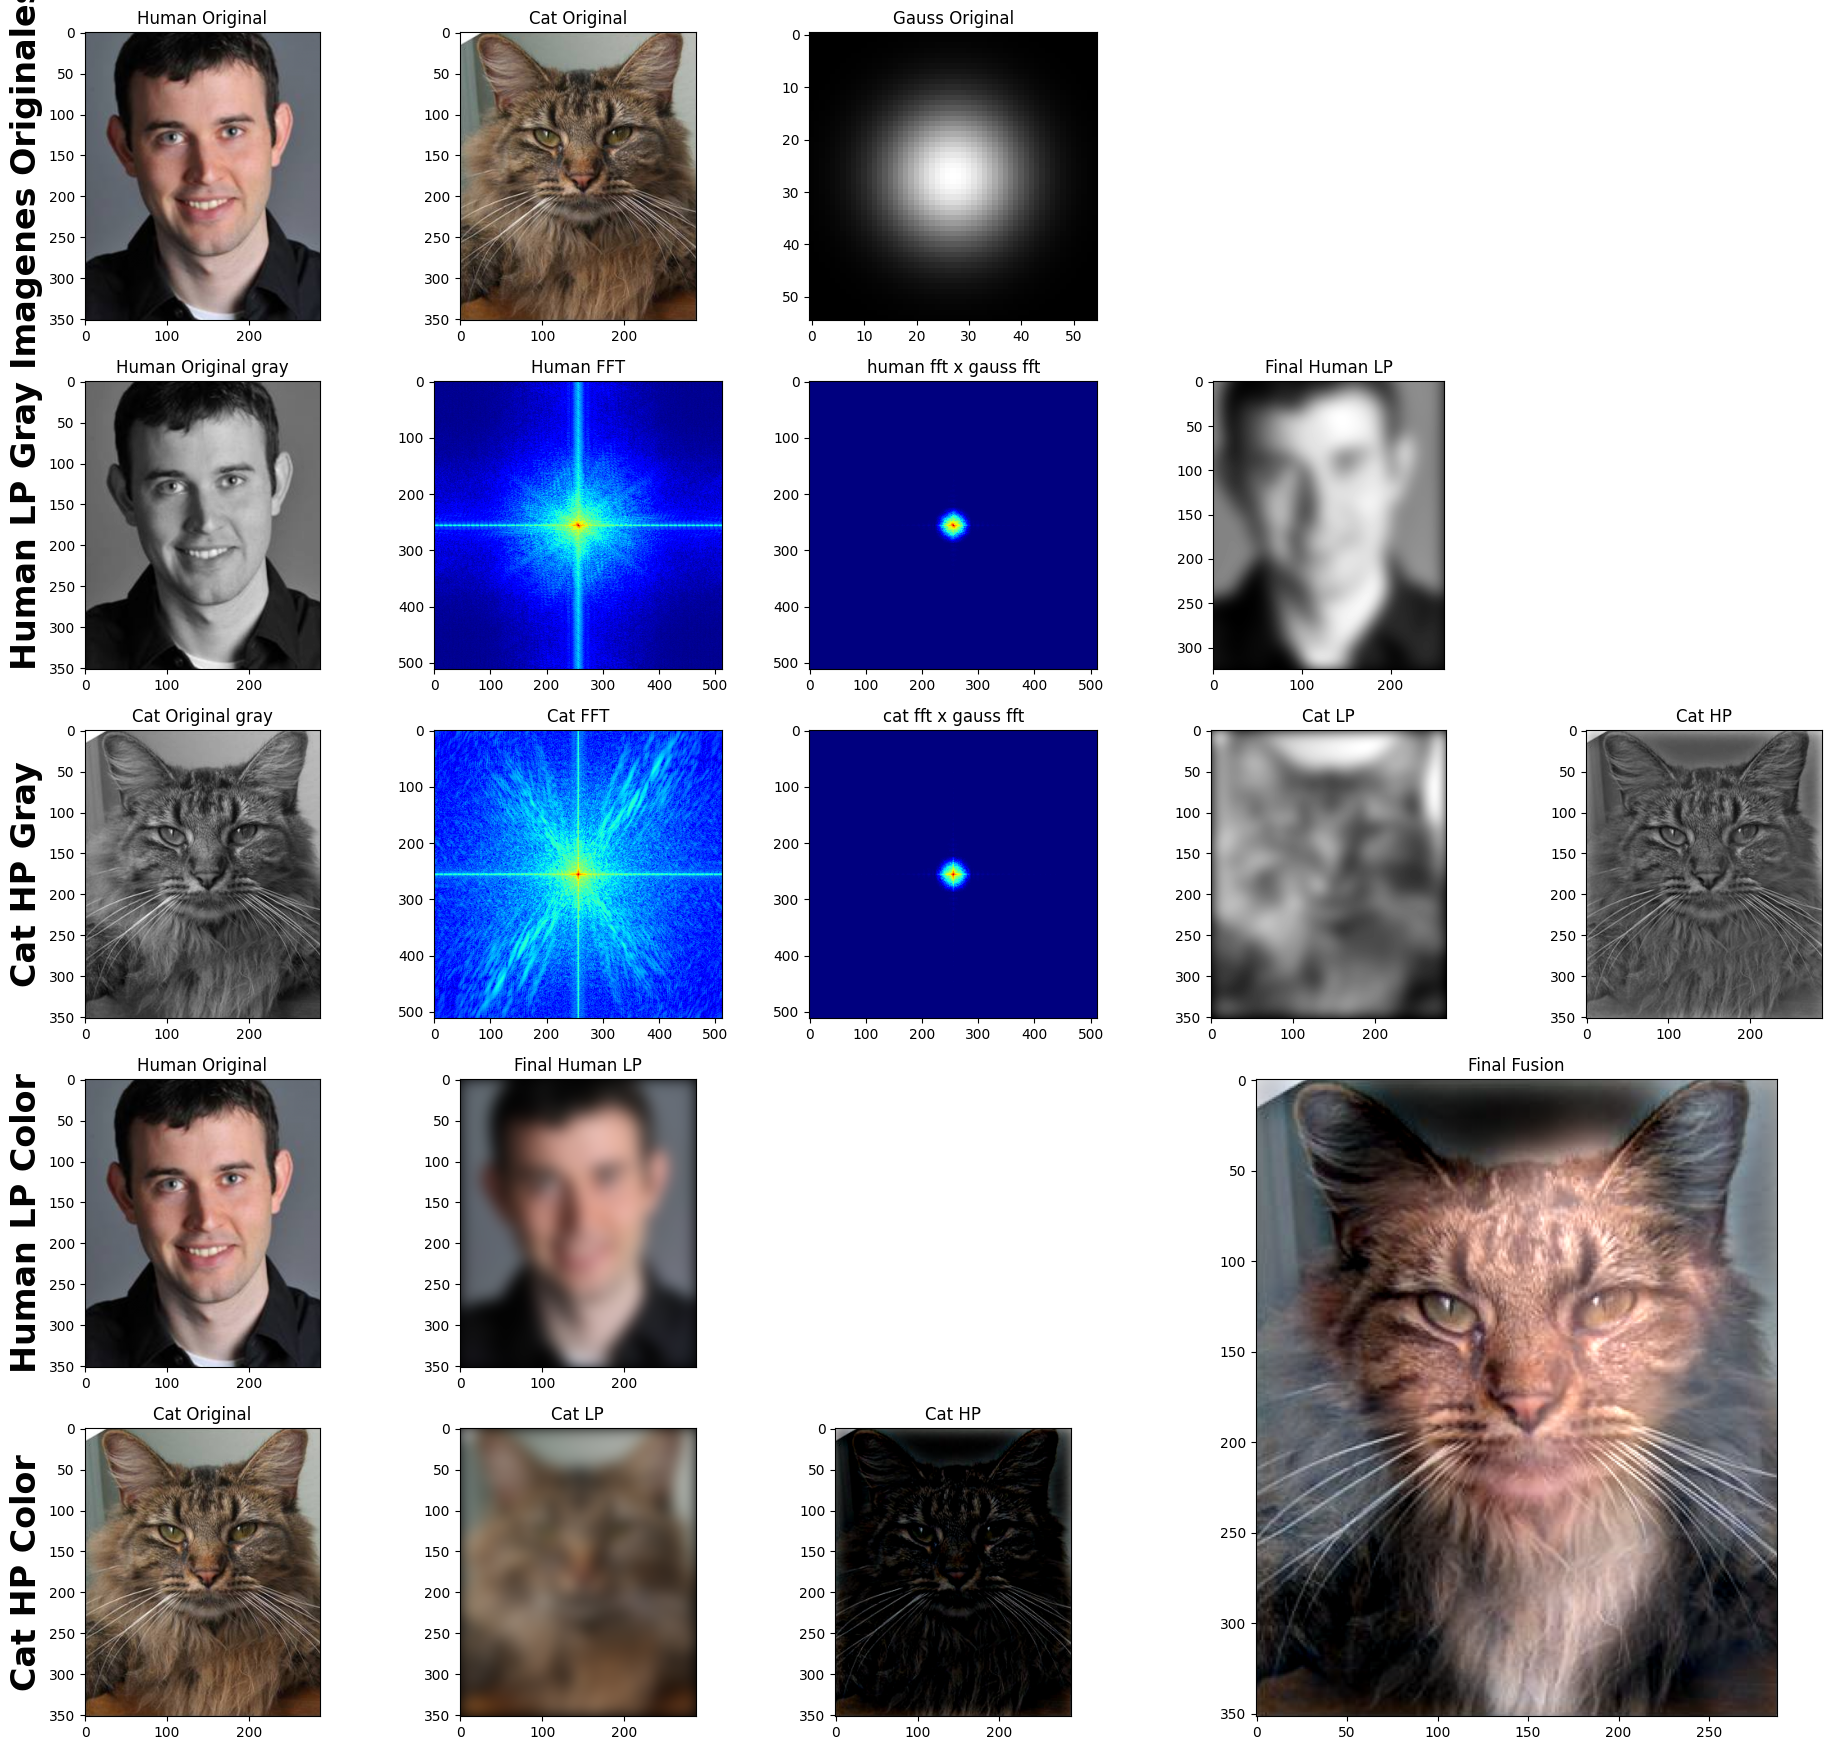

In [21]:
from scipy.fftpack import fft2, ifft2

fftsize = 512

SZ = 6*9+1
gauss_func = gauss(SZ, 9) # Funcion de gauss normal
gauss_func_fft = fft2(gauss_func, (fftsize, fftsize)) # Transformada de fourier de la funcion de Gauss

# Conseguimos el LP de la imagen humana
# Primero hacemos la transformada de fourier de la imagen
human_fft = fft2(human_img_gray, (fftsize, fftsize))
human_gauss_fft = human_fft * gauss_func_fft # Multiplicamos por la transformada de la gaussiana para conseguir la imagen LP

human_LP2D = np.real(ifft2(human_gauss_fft)) # Hacemos la inversa para conseguir la imagen LP

# Hacemos el crop de la imagen
hs=int(np.floor(SZ/2.))
human_LP2D = human_LP2D[hs:human_img.shape[0]+hs, hs:human_img.shape[1]+hs]

# Para conseguir la HP del gato conseguimos la LP y la restamos a la imagen original
# Conseguimos el LP de la imagen del gato

cat_fft = fft2(cat_img_gray, (fftsize, fftsize))
cat_gauss_fft = cat_fft * gauss_func_fft # Multiplicamos por la transformada de la gaussiana para conseguir la imagen LP

cat_LP2D = np.real(ifft2(cat_gauss_fft)) # Hacemos la inversa para conseguir la imagen LP
cat_LP2D_ = cat_LP2D[hs:cat_img.shape[0]+hs, hs:cat_img.shape[1]+hs]

cat_HP2D = cat_img_gray - cat_LP2D_

# Hacemos el crop de la imagen
hs=int(np.floor(SZ/2.))
human_LP2D = human_LP2D[hs:human_img.shape[0]+hs, hs:human_img.shape[1]+hs]

# Ahora hacemos lo mismo pero a color
# Como hay 3 canales tenemos que hacer las operaciones por cada canal

gauss_func = gauss(SZ, 9)
gauss_func_fft = fft2(gauss_func, shape=(fftsize, fftsize))

human_LP3D = np.zeros_like(human_img, dtype=np.float32)
cat_LP3D = np.zeros_like(cat_img, dtype=np.float32)
cat_HP3D = np.zeros_like(cat_img, dtype=np.float32)

# Hacemos el crop de la imagen para cada canal
for c in range(3):
    human_LP3D[..., c] = fourier_filter(human_img[..., c], gauss_func_fft, fftsize)
    cat_LP3D[..., c] = fourier_filter(cat_img[..., c], gauss_func_fft, fftsize)

cat_HP3D = cat_img - cat_LP3D

images = [
    ["Imagenes Originales", ["Human Original", "Cat Original", "Gauss Original"], [("color", human_img), ("color", cat_img), ("gray", gauss_func)]],
    ["Human LP Gray", ["Human Original gray", "Human FFT", "human fft x gauss fft", "Final Human LP"], [("gray", human_img_gray), ("fft", human_fft), ("fft", human_gauss_fft), ("gray", human_LP2D)]],
    ["Cat HP Gray", ["Cat Original gray", "Cat FFT", "cat fft x gauss fft", "Cat LP", "Cat HP"], [("gray", cat_img_gray), ("fft", cat_fft), ("fft", cat_gauss_fft), ("gray", cat_LP2D_), ("gray", cat_HP2D)]],

    # Imagenes a color
    ["Human LP Color", ["Human Original", "Final Human LP"], [("color", human_img), ("color", human_LP3D)]],
    ["Cat HP Color", ["Cat Original", "Cat LP", "Cat HP"], [("color", cat_img), ("color", cat_LP3D), ("color", cat_HP3D)]]
]
custom_plot(images, np.clip(cat_HP3D + human_LP3D, 0, 1))


# Comparacion de gaussianas

Para comparar el efecto de la sigma en diferentes gaussianas he creado un plot en el que hacemos la fusion con varias sigmas.

Podemos ver como la sigma de la gaussiana (la "anchura" de la distribucion) afecta en la ponderacion de los pixeles proximos, también podemos ver como al realizar la transformada de fourier parece que vaya al contrario, cuanto mas alta la sigma, mas estrecha es la transformada, esto tiene sentido si pensamos que al multiplicar por la gaussiana estamos obteniendo las bajas frecuencias de la imagen, por lo que una gaussiana mas estrecha (sigma mas alta originalmente) será menos tolerante a frecuencias altas, ya que las frecuencias altas en la representación de la transformada de fourier son aquellas que estan mas alejadas del centro.

Una vez entendido esto, también comprendemos porque con una sigma más baja nos perdemos tantas altas frecuencias (correspondientes al gato).

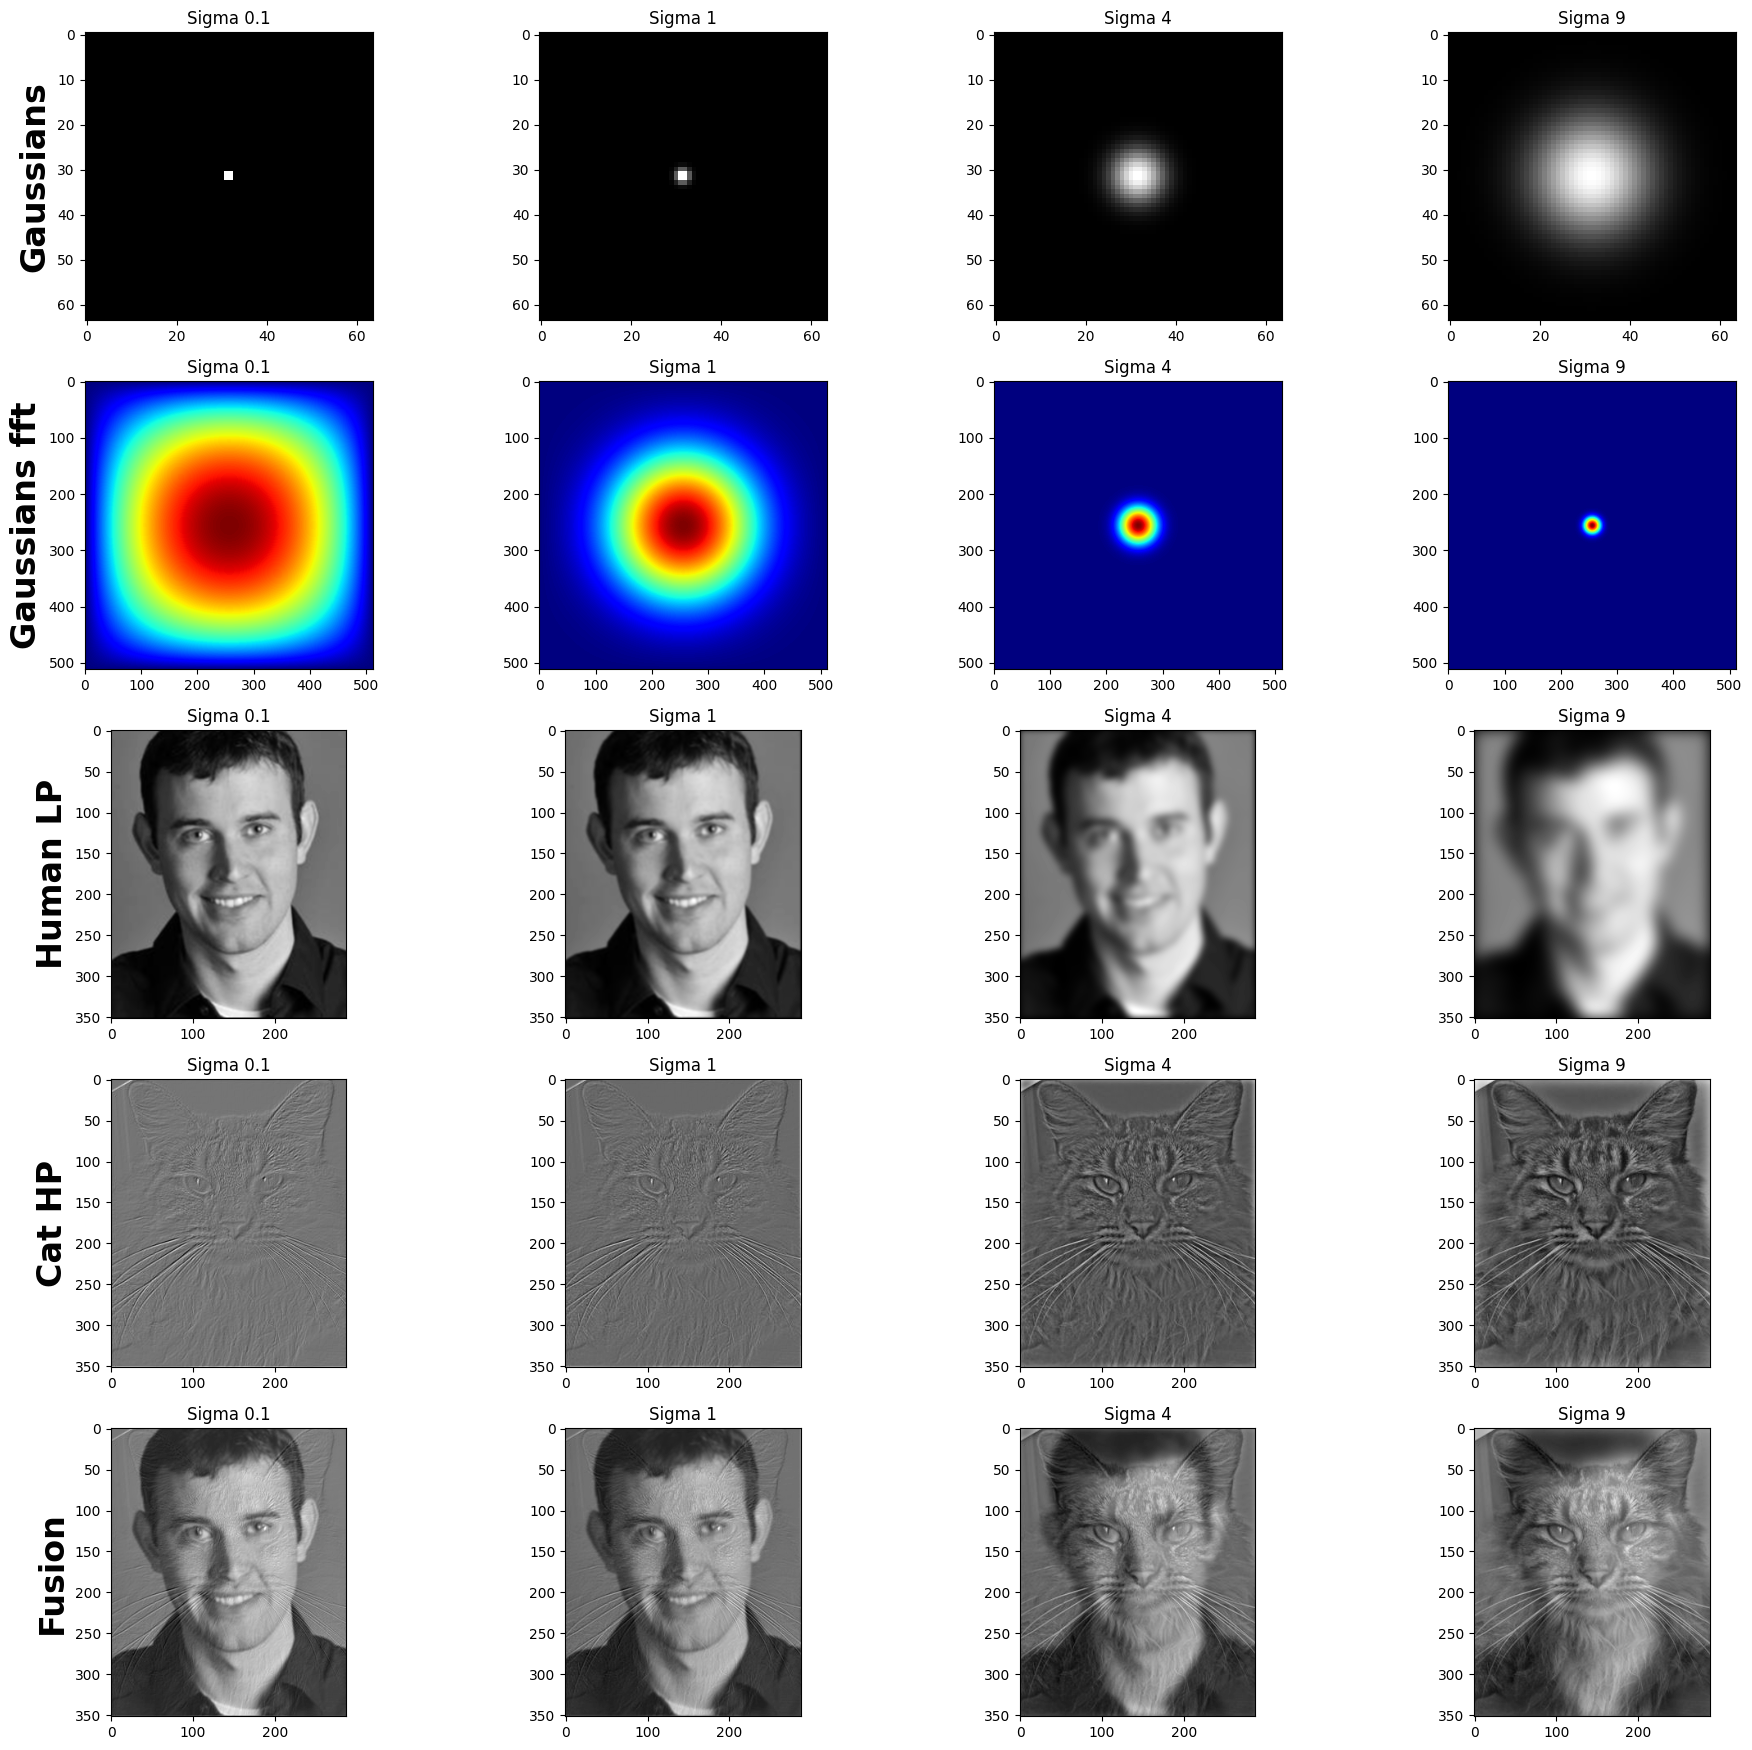

In [29]:

sigmas = [0.1, 1, 4, 9]
n_gaussians = len(sigmas)

SZ = 64
hs=int(np.floor(SZ/2.))

gaussians = [gauss(SZ, s) for s in sigmas]

gaussians_fft = [fft2(g, shape=(fftsize, fftsize)) for g in gaussians]

human_fft_ = fft2(human_img_gray, shape=(fftsize, fftsize))
cat_fft_ = fft2(cat_img_gray, shape=(fftsize, fftsize))


sigmas_titles = [f"Sigma {s}" for s in sigmas]

imagenes = [
    ["Gaussians", sigmas_titles, [("gray", g) for g in gaussians]],
    ["Gaussians fft", sigmas_titles, [('fft', g) for g in gaussians_fft]],
    ["Human LP", sigmas_titles, []],
    ["Cat HP", sigmas_titles, []],
    ["Fusion", sigmas_titles, []]
]

for g in gaussians_fft:
    imagenes[-3][-1].append(('gray', np.real(ifft2(human_fft_ * g))[hs:human_img.shape[0]+hs, hs:human_img.shape[1]+hs])) # Humans LP
    imagenes[-2][-1].append(('gray', cat_img_gray - np.real(ifft2(cat_fft_ * g))[hs:cat_img.shape[0]+hs, hs:cat_img.shape[1]+hs])) # Cat HP
    imagenes[-1][-1].append(('gray', imagenes[-3][-1][-1][1] + imagenes[-2][-1][-1][1])) # Fusion
    


custom_plot(imagenes, None)